# freud.diffraction.StaticStructureFactorDebye

The `freud.diffraction.StaticStructureFactorDebye` class computes a one-dimensional [static structure factor](https://en.wikipedia.org/wiki/Structure_factor) for a set of $N$ points, based on the Debye scattering equation:

$$ S(\mathbf{q}) = {\frac{1}{N}} \sum_{j=1}^{N}\sum_{k=1}^{N}{\frac{\sin(qr_{jk})}{qr_{jk}}}$$

The points used here were generated from a HOOMD-blue simulation of a 1000-particle system subject to the Lennard-Jones potential. For a tutorial of how to run such a simulation, see 00-Introducing-HOOMD-blue in Glotzerlab's [hoomd-examples repository](https://github.com/glotzerlab/hoomd-examples).

In [2]:
# Read in the simulation data
import gsd.hoomd

traj = gsd.hoomd.open("./data/trajectory.gsd", "rb")

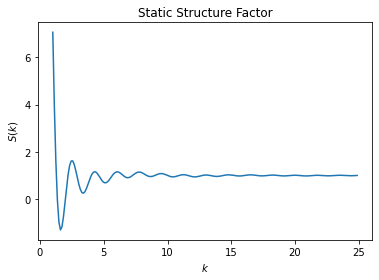

In [3]:
import freud
import matplotlib.pyplot as plt

sf = freud.diffraction.StaticStructureFactorDebye(bins=200, k_max=25, k_min=1)

# Accumulate S(q) over the entire trajectory
for frame in traj:
    box = frame.configuration.box
    points = frame.particles.position
    sf.compute((box, points), reset=False)
    
sf.plot()
plt.show()